In [2]:
# Import Libraries:
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
from pprint import pprint
import requests # To fetch data from our url API
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import and initialize coinmetrics API (in this case `cm` for the Coinmetrics Community API)
import coinmetrics # Coinmetrics API
cm = coinmetrics.Community()

In [3]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT (Coinmetrics Community URL API)
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
# pprint(asset_data)



In [46]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data and populate dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))

#Convert dictionary into Pandas dataframe and format to two decimals
asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA

# View dataframe
asset_data_df.head()


,date,open,close,high,low,volume,vwap
0,2021-08-20T00:00:00.000000000Z,"46,769.02","49,342.40","49,400.00","46,644.95","13,184.67","48,000.67"
1,2021-08-21T00:00:00.000000000Z,"49,349.99","48,867.02","49,821.92","48,285.28","9,574.84","49,058.09"
2,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07"
3,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69"
4,2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69"


# Rolling Average

In [47]:
asset_data_rolling_30day = asset_data_df['close'].rolling(window=30).mean()
print(asset_data_rolling_30day)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
86   62,684.23
87   62,775.80
88   62,728.49
89   62,672.13
90   62,425.29
Name: close, Length: 91, dtype: float64


# RSI - Alex

# BOLLINGER BANDS - Alex

# MAC D - Saydee

# V Wap

In [48]:
# Volume Weighted Average Price: Ratio of total value traded diveded by the total volume traded
# Create dataframe to work with
vwap_df = asset_data_df
# vwap_df = vwap_df.set_index(pd.DatetimeIndex(vwap_df['date']))

# # vwap_df["price_ma30"] = vwap_df["close"].rolling(window=30).mean()
# vwap_df["vwap_ma20"] = vwap_df["vwap"].rolling(window=20).mean()

# vwap_df["price_ma30"]


# CANDLE STICK
# fig_vwap = go.Figure(data=[go.Candlestick(x=vwap_df.index,
#                 open=vwap_df['open'],
#                 high=vwap_df['high'],
#                 low=vwap_df['low'],
#                 close=vwap_df['close'],name='BTC')])

vwap_df.head

<bound method NDFrame.head of                               date      open     close      high       low  \
0   2021-08-20T00:00:00.000000000Z 46,769.02 49,342.40 49,400.00 46,644.95   
1   2021-08-21T00:00:00.000000000Z 49,349.99 48,867.02 49,821.92 48,285.28   
2   2021-08-22T00:00:00.000000000Z 48,870.21 49,284.63 49,526.13 48,102.89   
3   2021-08-23T00:00:00.000000000Z 49,284.38 49,506.50 50,505.00 49,012.84   
4   2021-08-24T00:00:00.000000000Z 49,504.53 47,682.45 49,875.90 47,600.00   
..                             ...       ...       ...       ...       ...   
86  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02 65,525.00 63,596.90   
87  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59 66,339.90 63,371.00   
88  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98 63,624.60 58,638.00   
89  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51 60,824.38 58,380.00   
90  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00 60,977.21 56,514.13   

      volume      vwap  
0  13,18

In [49]:
#Calculate simple moving average 
def vwapma(data, window):
    return(data.rolling(window = window).mean()) #finding the 20 day simple moving average 
vwapma(vwap_df['close'], window = 20)

vwap_df['vwap_ma'] = vwapma(vwap_df['close'],20)
vwap_df.tail()

,date,open,close,high,low,volume,vwap,vwap_ma
86,2021-11-14T00:00:00.000000000Z,"64,400.01","65,505.02","65,525.00","63,596.90","6,081.57","64,515.20","62,881.02"
87,2021-11-15T00:00:00.000000000Z,"65,505.03","63,624.59","66,339.90","63,371.00","10,426.56","64,753.40","63,045.37"
88,2021-11-16T00:00:00.000000000Z,"63,621.05","60,107.98","63,624.60","58,638.00","24,910.15","60,821.42","63,128.00"
89,2021-11-17T00:00:00.000000000Z,"60,088.65","60,351.51","60,824.38","58,380.00","20,907.45","59,824.24","63,115.99"
90,2021-11-18T00:00:00.000000000Z,"60,351.51","56,898.00","60,977.21","56,514.13","26,749.21","58,560.83","62,847.06"


In [ ]:
#Calculate the upper and lower bands 
def vwap(data, sma, window):
    
    std = data.rolling(window=window).std() #finding how far the standard deviation is away from the mean 
    
# bollinger bands = simple moving average +- two standard deviations away

    upper_band = sma + std * 2 #creating the top band
    lower_band = sma -std * 2 #creating the lower band
    return upper_band, lower_band
bb_df['upper_band'],bb_df['lower_band'] = bb(bb_df['close'], bb_df['sma'],20)
bb_df.tail()

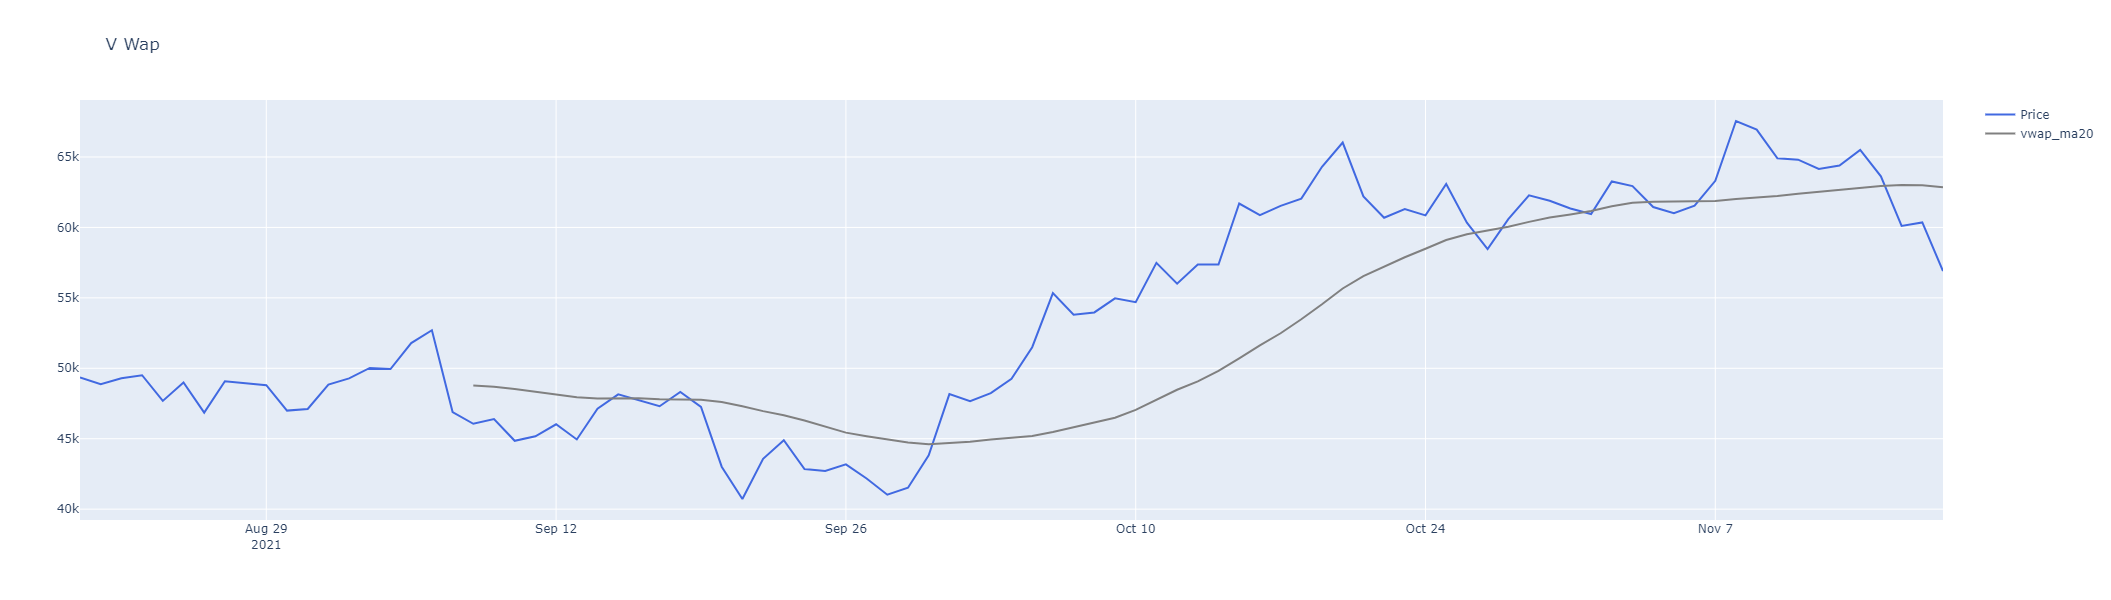

In [38]:
# LINE Graph
fig_vwap = make_subplots(rows=1, cols=1)
fig_vwap.add_trace(go.Scatter(x=vwap_df.index, y= vwap_df["close"], line=dict (color='royalblue', width=2), name = 'Price'), col=1, row=1)

fig_vwap.add_trace(go.Scatter(
    x=vwap_df.index,
    y=vwap_df['vwap_ma20'],
    mode='lines',
    name='vwap_ma20', 
    line=dict(color='grey',width=2)
))

fig_vwap.update_layout(
    height=600,
    title = 'V Wap'
)
fig_vwap.show()

# Rolling Averages - Jeff

# SKDJ - Stochastic Oscillator - Anjan

In [30]:
# Create dataframe to work with
skdj_df = asset_data_df
skdj_df = skdj_df.set_index(pd.DatetimeIndex(skdj_df['date']))

# Define Periods
k_period = 14
d_period = 3

# Adds a 'n_high' column with max value of previous 14 periods
skdj_df['n_high'] = skdj_df['high'].rolling(k_period).max()

# Adds a 'n_low' column with min value of previous 14 periods
skdj_df['n_low'] = skdj_df['low'].rolling(k_period).min()

#Uses the min/max values to calculate the %k (as a percentage)
skdj_df['%k'] = (skdj_df['close'] - skdj_df['n_low']) * 100 / (skdj_df['n_high'] - skdj_df['n_low'])

# Uses the %k to calculate a SMA over the past 3 values of %k
skdj_df['%d'] = skdj_df['%k'].rolling(d_period).mean()

skdj_df.head(20)

,date,open,close,high,low,volume,vwap,n_high,n_low,%k,%d
date,,,,,,,,,,,
2021-08-20 00:00:00+00:00,2021-08-20T00:00:00.000000000Z,"46,769.02","49,342.40","49,400.00","46,644.95","13,184.67","48,000.67",NaN,NaN,NaN,NaN
2021-08-21 00:00:00+00:00,2021-08-21T00:00:00.000000000Z,"49,349.99","48,867.02","49,821.92","48,285.28","9,574.84","49,058.09",NaN,NaN,NaN,NaN
2021-08-22 00:00:00+00:00,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07",NaN,NaN,NaN,NaN
2021-08-23 00:00:00+00:00,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69",NaN,NaN,NaN,NaN
2021-08-24 00:00:00+00:00,2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69",NaN,NaN,NaN,NaN
2021-08-25 00:00:00+00:00,2021-08-25T00:00:00.000000000Z,"47,682.45","48,987.33","49,277.00","47,122.02","9,289.23","48,212.27",NaN,NaN,NaN,NaN
2021-08-26 00:00:00+00:00,2021-08-26T00:00:00.000000000Z,"48,991.57","46,851.47","49,365.10","46,315.48","11,651.32","47,253.25",NaN,NaN,NaN,NaN
2021-08-27 00:00:00+00:00,2021-08-27T00:00:00.000000000Z,"46,851.47","49,077.57","49,185.12","46,361.01","8,924.12","47,765.93",NaN,NaN,NaN,NaN
2021-08-28 00:00:00+00:00,2021-08-28T00:00:00.000000000Z,"49,081.08","48,942.94","49,309.83","48,370.00","4,895.70","48,889.40",NaN,NaN,NaN,NaN


In [31]:
# # Creating a function to find the sell/buy price determined by the Stochastic Oscillator
# def skdj_signals(prices, skdj):    
#     buy_price = []
#     sell_price = []
#     signal = 0
#     skdj_signal = []

#     for i in range(len(rsi)):
#         if skdj_df['%k'][i] < 20: #When the calculated skdj is less than 20 creates a buy signal 
#             if signal != 1:
#                 buy_price.append(prices[i])
#                 sell_price.append(np.nan)
#                 signal = 1
#                 skdj_signal.append(signal) #A value of 1 would reflect the signal to buy 
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 signal = 0
#                 skdj_signal.append(0) #A value of 0 reflects a neautral postion 

#         elif skdj_df['rsi_14'][i] > 70: #When the calculted rsi is greater than 70 creates a sell signal
#             if signal != -1:
#                 buy_price.append(np.nan)
#                 sell_price.append(prices[i])
#                 signal = -1 
#                 skdj_signal.append(signal) #A value of -1 would refelct a signal to sell 
                
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 signal = 0
#                 skdj_signal.append(0)
#         else:
#             buy_price.append(np.nan)
#             sell_price.append(np.nan)
#             skdj_signal.append(0) 
            
         
#     return buy_price, sell_price, rsi_signal


#BUY // SELL INDICATORS

# append upper sell limit
skdj_df["sell_limit"] = 80

# append lower buy limit
skdj_df["buy_limit"] = 20

# append buy / sell signal
skdj_df.loc[skdj_df['%k'] < .5, 'skdj_signal'] = 1
skdj_df.loc[skdj_df['%k'] > 4, 'skdj_signal'] = -1
skdj_df.loc[skdj_df['%k'].between(.5, 4) , 'skdj_signal'] = 0

skdj_df.head(20)

,date,open,close,high,low,volume,vwap,n_high,n_low,%k,%d,sell_limit,buy_limit,skdj_signal
date,,,,,,,,,,,,,,
2021-08-20 00:00:00+00:00,2021-08-20T00:00:00.000000000Z,"46,769.02","49,342.40","49,400.00","46,644.95","13,184.67","48,000.67",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-21 00:00:00+00:00,2021-08-21T00:00:00.000000000Z,"49,349.99","48,867.02","49,821.92","48,285.28","9,574.84","49,058.09",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-22 00:00:00+00:00,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-23 00:00:00+00:00,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-24 00:00:00+00:00,2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-25 00:00:00+00:00,2021-08-25T00:00:00.000000000Z,"47,682.45","48,987.33","49,277.00","47,122.02","9,289.23","48,212.27",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-26 00:00:00+00:00,2021-08-26T00:00:00.000000000Z,"48,991.57","46,851.47","49,365.10","46,315.48","11,651.32","47,253.25",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-27 00:00:00+00:00,2021-08-27T00:00:00.000000000Z,"46,851.47","49,077.57","49,185.12","46,361.01","8,924.12","47,765.93",NaN,NaN,NaN,NaN,80,20,NaN
2021-08-28 00:00:00+00:00,2021-08-28T00:00:00.000000000Z,"49,081.08","48,942.94","49,309.83","48,370.00","4,895.70","48,889.40",NaN,NaN,NaN,NaN,80,20,NaN


### Creating SKDJ Chart

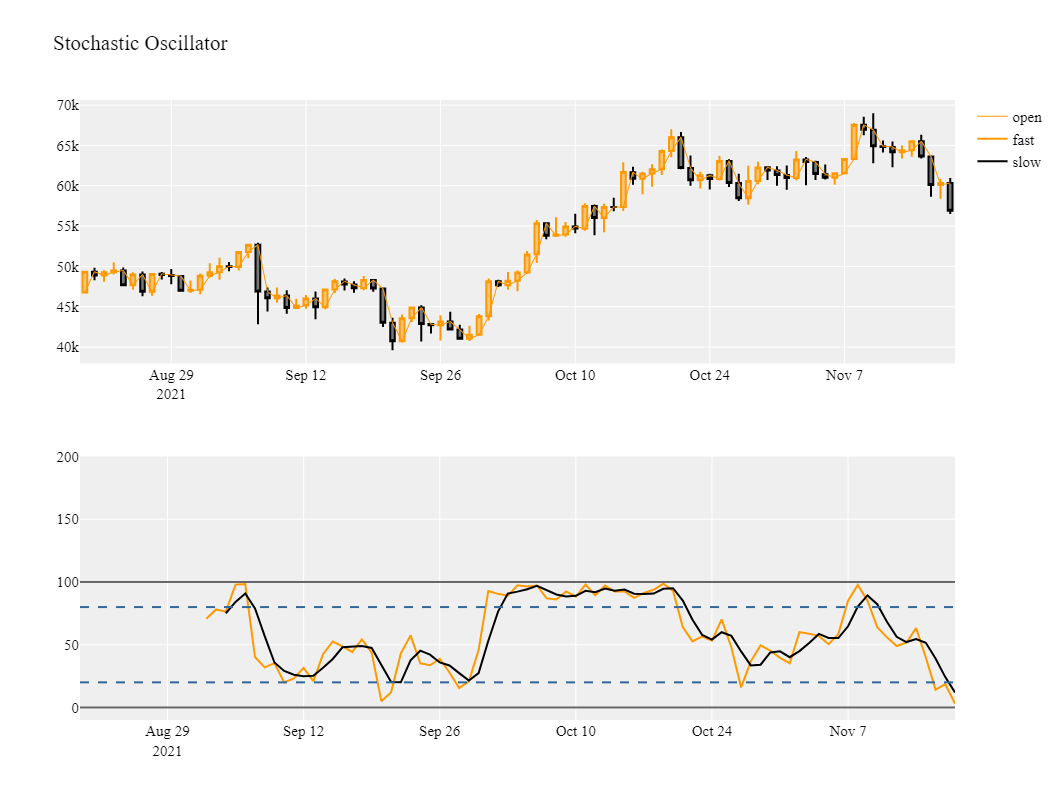

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create primary chart
fig_skdj = make_subplots(rows=2, cols=1)

# Create Candlestick chart with an overlaid price line
fig_skdj.append_trace(
    go.Candlestick(
        x=skdj_df.index,
        open = skdj_df['open'],
        high = skdj_df['high'],
        low = skdj_df['low'],
        close = skdj_df['close'],
        increasing_line_color = '#ff9900',
        decreasing_line_color = 'black',
        showlegend = False
    ), row=1, col=1 
)

# price Line
fig_skdj.append_trace(
    go.Scatter(
        x = skdj_df.index,
        y = skdj_df['open'],
        line = dict(color='#ff9900', width=1),
        name = 'open',
    ), row=1, col=1
)

# Fast Signal (%k)
fig_skdj.append_trace(
    go.Scatter(
        x = skdj_df.index,
        y = skdj_df['%k'],
        line = dict(color='#ff9900', width=2),
        name = 'fast',
    ), row=2, col=1
)

# Slow Signal (%d)
fig_skdj.append_trace(
    go.Scatter(
        x = skdj_df.index,
        y = skdj_df['%d'],
        line = dict(color='#000000', width=2),
        name = 'slow'
    ), row=2, col=1
)

# Extend our y-axis
fig_skdj.update_yaxes(range=[-10, 200], row=2, col=1)

# Add upper/lower bounds
fig_skdj.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig_skdj.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

# Add overbought/oversold
fig_skdj.add_hline(y=20, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig_skdj.add_hline(y=80, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='sans serif',
    font_color='#000000',
    font_size=15,
    title = 'Stochastic Oscillator',
    height = 800,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
fig_skdj.update_layout(layout)

fig_skdj.show()

In [8]:
### Logic
# # Overbought status
# if k > 80 and d > 80 and k < d:
#     sell
# # Oversold status   
# else if k < 20 and d < 20 and k > d:
#     buy
# # Something in the middle
# else:
#     do nothing

# NVT - Network Value to Transaction

# The Puell Multiple - Brian / Jeff

# Sharpe Ratios

In [9]:
# Risk free rate doc saves in resources
# SAMPLE: risk_free_rate = 0.0000022
# combined_sharpe_ratios = ((combined_returns.mean()-(risk_free_rate)) * 252) / (combined_returns.std() * np.sqrt(252))
